In [55]:
# External Modules
from darts import TimeSeries
import matplotlib.pyplot as plt
from darts.models import XGBModel

In [56]:
# Imports and path setting
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory of the notebook directory
parent_dir = os.path.dirname(notebook_dir)
# Append the parent directory to the system path
sys.path.append(parent_dir)

In [57]:
# Now you can import modules from the 'data' folder
from data.prepared_data import df
display(df)

,datetime,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
96,2020-01-02 00:00:00,1.12184,1.12186,1.12156,1.12157,1.12198,1.12199,1.12167,1.12168
97,2020-01-02 00:15:00,1.12154,1.12164,1.12151,1.12155,1.12168,1.12177,1.12165,1.12169
98,2020-01-02 00:30:00,1.12157,1.12169,1.12152,1.12167,1.12169,1.12182,1.12164,1.12181
99,2020-01-02 00:45:00,1.12169,1.12183,1.12169,1.12178,1.12181,1.12197,1.12181,1.12191
100,2020-01-02 01:00:00,1.12177,1.12225,1.12176,1.12221,1.12190,1.12238,1.12188,1.12234
...,...,...,...,...,...,...,...,...,...
143708,2024-02-05 23:00:00,1.07424,1.07426,1.07414,1.07419,1.07443,1.07445,1.07431,1.07439
143709,2024-02-05 23:15:00,1.07419,1.07426,1.07419,1.07423,1.07439,1.07443,1.07434,1.07438
143710,2024-02-05 23:30:00,1.07423,1.07423,1.07403,1.07420,1.07438,1.07440,1.07420,1.07437
143711,2024-02-05 23:45:00,1.07420,1.07427,1.07401,1.07404,1.07437,1.07443,1.07417,1.07419


In [58]:
# Trim DataFrame to smaller size, such that training takes less time
# THIS IS JUST TEMPORARY TO MAKE TESTING EASIER: TEMOVE LATER!!!!!

# Calculate the number of rows to select (30% of total rows)
#selection_share = 0.1
#rows_to_select = int(len(df) * selection_share)

# Select the first x rows
df = df.head(1000)

# Get length of current DataFrame
print(f'Number of rows: {len(df)}')

Number of rows: 1000


In [59]:
# Save datetiem column
dates = df['datetime']

# Reset index to a range of integers
df.reset_index(drop=True, inplace=True)
df.drop('datetime', axis = 1, inplace=True)

display(df)

C:\Users\Paul\AppData\Local\Temp\ipykernel_15492\4094773501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('datetime', axis = 1, inplace=True)


,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
0,1.12184,1.12186,1.12156,1.12157,1.12198,1.12199,1.12167,1.12168
1,1.12154,1.12164,1.12151,1.12155,1.12168,1.12177,1.12165,1.12169
2,1.12157,1.12169,1.12152,1.12167,1.12169,1.12182,1.12164,1.12181
3,1.12169,1.12183,1.12169,1.12178,1.12181,1.12197,1.12181,1.12191
4,1.12177,1.12225,1.12176,1.12221,1.12190,1.12238,1.12188,1.12234
...,...,...,...,...,...,...,...,...
995,1.11580,1.11599,1.11548,1.11558,1.11592,1.11612,1.11560,1.11570
996,1.11559,1.11581,1.11548,1.11564,1.11571,1.11593,1.11560,1.11576
997,1.11563,1.11588,1.11532,1.11532,1.11575,1.11600,1.11544,1.11544
998,1.11533,1.11561,1.11497,1.11531,1.11545,1.11573,1.11509,1.11542


In [60]:
# Extract traget and covariate columns
target_col = df['bid_open']
covariate_cols = df[['bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]

# Create Darts TimeSeries objects
series = TimeSeries.from_dataframe(df)  # Replace 'column_to_drop' with the name of the column you want to drop)
target_series = TimeSeries.from_series(target_col)
cov_series = TimeSeries.from_series(covariate_cols)

In [61]:
# Split the data into training and validation sets
train_split = 0.3
train_size = int(len(target_series) * train_split)
train, val = target_series[:train_size], target_series[train_size:]

<Axes: xlabel='time'>

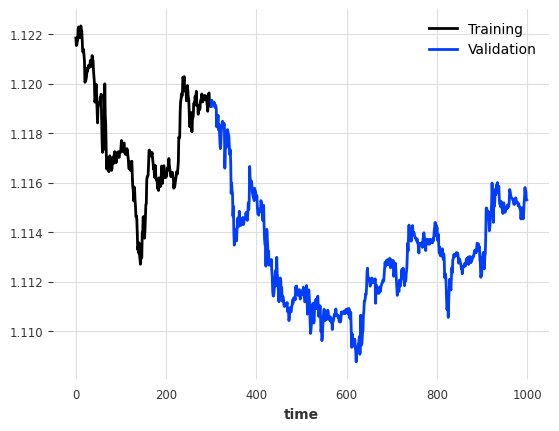

In [62]:
train.plot(label = 'Training')
val.plot(label = 'Validation')

In [63]:
model = XGBModel(lags=12)

historical_fcast_XGB = model.historical_forecasts(
    target_series,
    start=0.3,
    forecast_horizon=1,
    verbose=True
)


`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/701 [00:00<?, ?it/s]

<Axes: xlabel='time'>

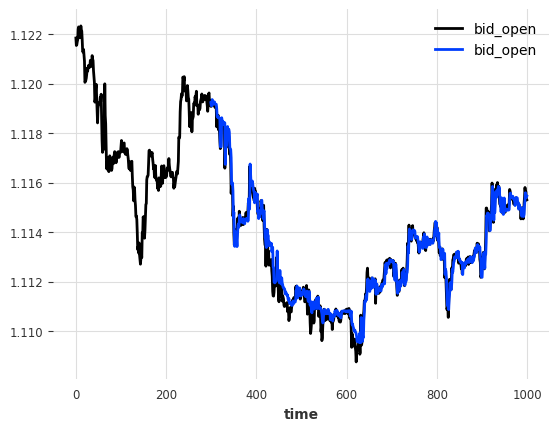

In [64]:
target_series.plot()
historical_fcast_XGB.plot()

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


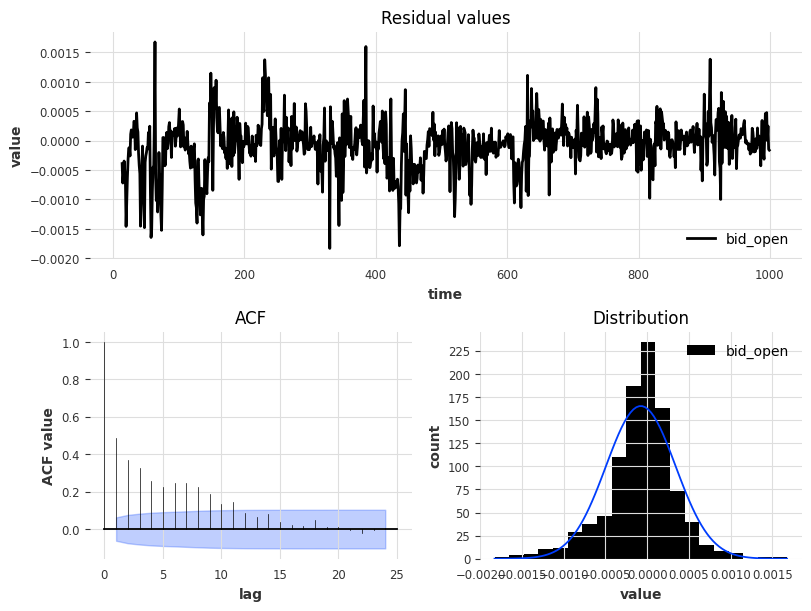

In [65]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(model.residuals(target_series))

In [66]:
from darts.models import NaiveDrift

model_naive_drift = NaiveDrift()

historical_fcast_naive_drift = model_naive_drift.historical_forecasts(
    target_series,
    start=0.3,
    forecast_horizon=1,
    verbose=True,
    show_warnings = False
)


  0%|          | 0/701 [00:00<?, ?it/s]

<Axes: xlabel='time'>

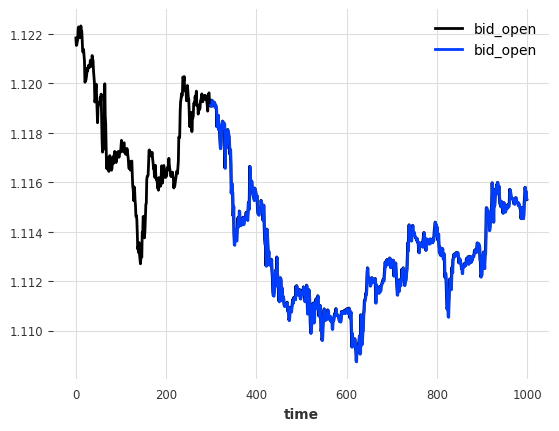

In [67]:
target_series.plot()
historical_fcast_naive_drift.plot()

In [73]:
import numpy as np
np.array(historical_fcast_XGB.values())

array([[1.1192303],
       [1.1191019],
       [1.1191016],
       [1.1193527],
       [1.1192664],
       [1.1191716],
       [1.1191645],
       [1.119169 ],
       [1.1192597],
       [1.1191874],
       [1.1191676],
       [1.1191669],
       [1.1191652],
       [1.1189871],
       [1.1186725],
       [1.1186731],
       [1.1186182],
       [1.1186483],
       [1.118622 ],
       [1.1185997],
       [1.118545 ],
       [1.1174452],
       [1.1174543],
       [1.1174437],
       [1.1186191],
       [1.1184868],
       [1.1184843],
       [1.11841  ],
       [1.1183482],
       [1.1184396],
       [1.1184148],
       [1.1184115],
       [1.1167337],
       [1.1174083],
       [1.1174527],
       [1.1175026],
       [1.1179845],
       [1.1182648],
       [1.1181213],
       [1.118153 ],
       [1.118145 ],
       [1.1180356],
       [1.1174219],
       [1.1173629],
       [1.117342 ],
       [1.1170019],
       [1.1159314],
       [1.1159344],
       [1.1159868],
       [1.1156552],
